# Use Case Summary
- Objective Statement:
  - To get insight how much sales based on tv advertising
  - To get insight how much money is spent on advertising on TV
  - To gain insight into the relationship between sales and TV marketing
  - To predict sales using Linear Regression based on TV advertising
  - To get insight about model deployment using MLflow

- Challenges:
  - There are no other variables as a comparison

- Methodology / Analytic Technique:
  - Descriptive Analysis
  - Graph Analysis
  - Modeling using Linear Regression
  - Model Deployment using MLflow

- Business Benefit:
  - Knowing how much sales from tv advertising
  - Knowing how sales predict results by placing ads on TV
  - Helping business team optimize spent advertising costs

- Expected Outcome:
  - Know how much sales based on TV advertising
  - Know how much money is spent on advertising on TV
  - Know about relationship between sales and TV marketing
  - Know the results of sales prediction using Linear Regression based on TV advertising
  - Know about creating model deployments using MLflow and the results

# Business Understanding
- Tv Marketing is the method of demonstrating features of products and providing their information on television to attract viewers and encourage them to buy the shown products is called trade through television marketing.
- This case has some business question using the data:
 - How much company spent money on TV advertising?
 - How much money is spent on advertising on TV?
 - How about relationship between sales and TV marketing?
 - How about the results of sales prediction based using Linear Regression on TV advertising?
 - How to create a model deployment using MLflow?

# Data Understanding

- Data of TV Marketing
- This data have 2 columns and 200 rows
- Source Code : https://www.kaggle.com/datasets/leiadis/tvmarketing
- Data Dictionary :
  - TV : money spent on advertising via TV
  - Sales : number of sales

# Data Preparation
Code Used:
- Python Version: 3.7.15
- Packages: Pandas, Numpy, Matplotlib, Seaborn, MLFlow, sklearn and Warnings



# Data Profiling

First of all, we will import package which will be used in processing this data, especially with Linear Regression modeling and model deployment using mlflow

In [ ]:
#pip install mlflow

In [ ]:
#pip install mlflow[extras]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

### Import dataset

The dataset is uploaded from the computer for use

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tvmarketing.csv to tvmarketing.csv


### Load dataset

Then define the tvmarketing dataset into the df variable and read it with the syntax above.

In [ ]:
df = pd.read_csv('tvmarketing.csv')

### Preview dataset

We will see a preview of the previously loaded dataset

In [ ]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


The table above is a display of the **top 5 rows** of the dataset to be used.

### Info dataset

We will display information from an existing dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


The dataset has a total of **200 values** and the data type is float

### Check missing value

In this section we will check whether there are missing values or not

In [ ]:
df.isna().sum()

TV       0
Sales    0
dtype: int64

It can be seen that the dataset **has no empty values**.

### Describe Dataset

We will display basic statistical information from TV Marketing data such as percentile, mean, std, etc.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


From the above table it is known that there are 200 rows with **average** money spent on advertising **through TV** is **147.04** and **average sales** is **14 ,02**. Money spent on advertising **least is 0.7** and **most is 296.4**. The **least sale is 1.6** and the **most is 27**.

# Data Cleansing

The dataset is clean because the data no longer has missing values and the data types are already appropriate.

# Exploratory Data Analysis

### Scatterplot

We'll display a scatterplot to see the relationship between sales and TV marketing

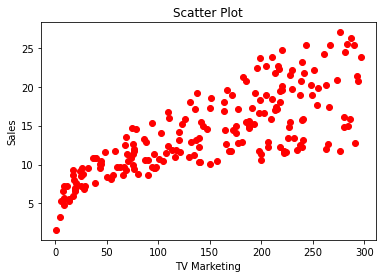

In [ ]:
plt.scatter(df['TV'],df['Sales'], color = 'red')
plt.title('Scatter Plot')
plt.xlabel("TV Marketing")
plt.ylabel("Sales")
plt.show()

From the chart above, it can be seen that there is a **strong relationship** between TV advertising and sales. Based on scatterplot, the relationship between TV advertising and sales is **directly proportional**. As more money is spent on advertising on TV, sales will increase.

### Heatmap

We will display a heatmap to see the relationship between sales and TV marketing from the correlation values.

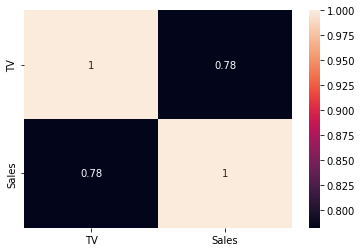

In [ ]:
sns.heatmap(df.corr(),annot=True)

From the heatmap above, it can be seen that **there is a strong relationship** between TV advertising and sales. This is because the correlation value between sales and tv marketing is **0.78** where it is **more than 0.5**.

# Preprocessing Modeling

Next we will do preprocessing modeling. The variable Y to be used is the Sales variable so for the variable X it can be defined for all variables except the Sales variable.

In [ ]:
X = df.drop(['Sales'], axis=1)
y = df['Sales']

### Splitting Train & Test

Before modeling, it is necessary to divide the dataset into two parts, namely the part used for data training and for data testing with a proportion of 1/3.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=1/3,random_state=42)

# Modeling: Linear Regression

At this stage, we will do modeling with training data using a Linear Regression model.

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

After that, we will make predictions using the previously trained Linear Regression model. You can see a comparison between modeling training datasets and predicting testing datasets that can be continued to the model evaluation stage.

In [ ]:
y_pred =  model.predict(X_test)

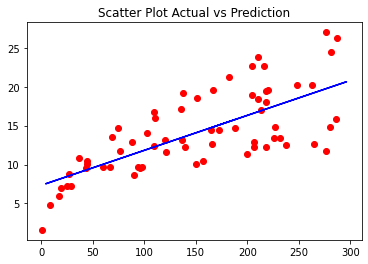

In [ ]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_test.values, y_pred, color='blue')
plt.title('Scatter Plot Actual vs Prediction')
plt.show()

Based on the scatter plot above, it can be seen that the modeled train data tends to **approach the linear line** which is the result of the prediction. This means that the data and the predicted results are not much different so it can be said that **the data follows a linear regression model**.

# Evaluate Model

In the last stage, we will evaluate the model using MAE, MAPE, R-Square, and RMSE to see if the model formed is good enough.

In [ ]:
result = pd.DataFrame({'Actual': y_test, 'Predict': y_pred})
result

,Actual,Predict
95,16.9,14.670372
15,22.4,16.110618
30,21.4,20.485196
158,7.3,7.868464
128,24.7,17.227818
...,...,...
39,21.5,17.573297
168,17.1,17.007967
47,23.2,18.107220
94,11.5,12.162281


### MAE
MAE is the average of the absolute difference between the actual value and the predicted value

In [ ]:
mean_absolute_error(y_test, y_pred)

2.3813679825552074

Based on the evaluation of the model using MAE, a fairly small value was obtained and close to 0, which is 2,381. This means that the formed model is good for prediction.

### MAPE 
MAPE (Mean Absolute Percentage Error) is the mean absolute percentage difference between the actual and the predicted value.


In [ ]:
mean_absolute_percentage_error(y_test, y_pred)

0.18279457728279747

Based on the evaluation of the model using MAPE, a value of 0.18 or 18% is obtained, where this figure is below 20%. This means that the model formed has good forecasting results.

### R-Square Score
R square is a number ranging from 0 to 1 which indicates the magnitude of the combination of independent variables together affecting the value of the dependent variable

In [ ]:
r2_score(y_test,y_pred)

0.6569436980049992

Based on the evaluation of the model using R-Square, a value of 0.65 or 65% is obtained. This means that TV advertising has an effect of 65% on sales while the remaining 35% is influenced by other unknown factors.


### RMSE
Root Mean Square Error (RMSE) is the sum of the squared errors or the difference between the actual value and the predetermined predicted value.

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

3.060418770219597

Based on the evaluation of the model using the RMSE, a fairly small value was obtained and close to 0, which is 3.06. This means that the model is good enough to make predictions.

# Model Deployment

We will create a deployment pipeline


In [ ]:
# Data Profiling
# Import Package

import os
import sys

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import warnings
warnings.filterwarnings('ignore')

from urllib.parse import urlparse

import mlflow
import mlflow.sklearn

import logging

logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

if __name__ == "_main_":
    warnings.filterwarnings("ignore")
    np.random.seed(40)

#Load Dataset
df = pd.read_csv('tvmarketing.csv')

#Preprocessing Modeling
X = df.drop(['Sales'], axis=1)
y = df['Sales']

#Splitting Training and Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 1/3, random_state = 42)

# Eval Metrics
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mape = mean_absolute_percentage_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, mape, r2

# modeling

with mlflow.start_run():
        lr = LinearRegression()
        lr.fit(X_train, y_train)

        y_pred = lr.predict(X_test)

        (rmse, mae, mape, r2) = eval_metrics(y_test, y_pred)

        print("  RMSE: %s" % rmse)
        print("  MAE: %s" % mae)
        print("  MAPE: %s" % mape)
        print("  R2: %s" % r2)


        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("mae", mae)
        mlflow.log_metric("mape", mape)
        mlflow.log_metric("r2", r2)
    

        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        if tracking_url_type_store != "file":
            mlflow.sklearn.log_model(lr, "model", registered_model_name="Linear Regression")
        else:
            mlflow.sklearn.log_model(lr, "model")

ModuleNotFoundError: ignored

Based on the model deployment above, the same model evaluation value is generated as the previously obtained evaluation results. If we use visual studio to create the model deployment, it can be displayed mlflow ui 

# Result
- Based on the scatterplot, the relationship between TV advertising and sales is directly proportional. The more advertising on TV, the sales are also increasing.
- Based on the heatmap graph, it can be seen that there is a strong relationship between TV advertising and sales.
- The correlation value on the heatmap obtained is 0.78 where the figure is above 0.5.
- Based on the evaluation of the model using MAE, a fairly small value is obtained, it is 2,381. This means that the model formed is good for predictions.
- Based on the evaluation of the model using MAPE, a value of 0.18 or 18% is obtained, where this figure is below 20%. This means that the model formed has good forecasting results.
- Based on the evaluation of the model using R-Square, a value of 0.65 or 65% is obtained. This means that TV advertising has an effect of 65% on sales while the remaining 35% is influenced by other unknown factors.
- Based on the evaluation of the model using the RMSE, a fairly small value is obtained, namely 3.06. This means that the model is good enough to make predictions.

# Recommendation
- In research other predictor variables can be added so that it is possible to get a better model.
- Companies must optimize the costs spent on advertising through TV because there are some sales are not necessarily high when the money spent on advertising is high.
- The company can increase sales by advertising products through social media, news, etc

# Deployment

Deployment is a step to integrate of the model into an existing production environment which can take in an input and return an output that can be used in making practical business decisions. To deploy model we use the MLflow library.

MLflow is a platform to streamline machine learning development, including tracking experiments, packaging code into reproducible runs, and sharing and deploying models.

MLflow’s current components are:

- MLflow Tracking: An API to log parameters, code, and results in machine learning experiments and compare them using an interactive UI.

- MLflow Projects: A code packaging format for reproducible runs using Conda and Docker, so you can share your ML code with others.

- MLflow Models: A model packaging format and tools that let you easily deploy the same model (from any ML library) to batch and real-time scoring on platforms such as Docker, Apache Spark, Azure ML and AWS SageMaker.

- MLflow Model Registry: A centralized model store, set of APIs, and UI, to collaboratively manage the full lifecycle of MLflow Models.

## Result of Model Deployment
Based on the model deployment, we can track model evaluations based on RMSE, MAE, MAPE, and R-Square in mlflow UI